AUDIO BASED EMOTION DETECTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
dataset="/content/drive/MyDrive/archive (3)/audio_speech_actors_01-24/"
dir_list=os.listdir("/content/drive/MyDrive/archive (3)/audio_speech_actors_01-24/")
emotion = []
gender = []
path = []

for i in dir_list:
    fname = os.listdir(dataset + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp % 2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(dataset + i + '/' + f)

RAVD_df = pd.DataFrame({
    'path': path,
    'gender': gender,
    'emotion': emotion
})

RAVD_df['emotion'] = RAVD_df['emotion'].replace({
    1: 'neutral',
    2: 'neutral',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'
})
RAVD_df['labels'] = RAVD_df['gender'] + '_' + RAVD_df['emotion']
print(RAVD_df['labels'].value_counts())
print(RAVD_df.head())

labels
male_neutral       144
female_neutral     144
male_happy          96
male_sad            96
male_angry          96
male_disgust        96
male_fear           96
male_surprise       96
female_happy        96
female_angry        96
female_sad          96
female_surprise     96
female_fear         96
female_disgust      96
Name: count, dtype: int64
                                                path gender  emotion  \
0  /content/drive/MyDrive/archive (3)/audio_speec...   male  neutral   
1  /content/drive/MyDrive/archive (3)/audio_speec...   male  neutral   
2  /content/drive/MyDrive/archive (3)/audio_speec...   male  neutral   
3  /content/drive/MyDrive/archive (3)/audio_speec...   male    happy   
4  /content/drive/MyDrive/archive (3)/audio_speec...   male  neutral   

         labels  
0  male_neutral  
1  male_neutral  
2  male_neutral  
3    male_happy  
4  male_neutral  


In [ ]:
def extract(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_mean = np.mean(zcr)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    pitch_mean = np.mean(spectral_centroid)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    hnr = librosa.effects.harmonic(y)
    rms = librosa.feature.rms(y=y)
    zcr_var = np.var(librosa.feature.zero_crossing_rate(y))
    spectral_entropy = -np.sum(np.mean(spectral_contrast_mean) * np.log2(np.mean(spectral_contrast_mean)))
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)
    features = {
        'mfcc_mean': np.mean(mfcc_mean),
        'zcr_mean': zcr_mean,
        'pitch_mean': pitch_mean,
        'chroma_mean': np.mean(chroma_mean),
        'spectral_contrast_mean': np.mean(spectral_contrast_mean),
        'hnr_mean': np.mean(hnr),
        'rms_mean': np.mean(rms),
        'zcr_var': zcr_var,
        'spectral_entropy': spectral_entropy,
        'tonnetz_mean': np.mean(tonnetz)
    }

    return features

def add_features_to_dataset(dataset):
    feature_columns = ['mfcc_mean', 'zcr_mean', 'pitch_mean', 'chroma_mean', 'spectral_contrast_mean','hnr_mean','rms_mean','zcr_var','spectral_entropy','tonnetz_mean']
    for idx, row in dataset.iterrows():
        audio_path = row['path']
        features = extract(audio_path)
        for feature_name, feature_value in features.items():
            dataset.at[idx, feature_name] = feature_value

    return dataset

RAVD_df = add_features_to_dataset(RAVD_df)
print(RAVD_df.head())

                                                path gender  emotion  \
0  /content/drive/MyDrive/archive (3)/audio_speec...   male  neutral   
1  /content/drive/MyDrive/archive (3)/audio_speec...   male  neutral   
2  /content/drive/MyDrive/archive (3)/audio_speec...   male  neutral   
3  /content/drive/MyDrive/archive (3)/audio_speec...   male    happy   
4  /content/drive/MyDrive/archive (3)/audio_speec...   male  neutral   

         labels  mfcc_mean  zcr_mean   pitch_mean  chroma_mean  \
0  male_neutral -42.727196  0.061183  6335.288858     0.589135   
1  male_neutral -45.487026  0.062088  6190.447826     0.530708   
2  male_neutral -44.829060  0.053918  6792.231704     0.585784   
3    male_happy -42.884941  0.041509  6403.611239     0.550580   
4  male_neutral -48.542679  0.061437  6565.972575     0.577579   

   spectral_contrast_mean      hnr_mean  rms_mean   zcr_var  spectral_entropy  \
0               15.121053 -1.404243e-07  0.005118  0.001895        -59.251643   
1       

In [ ]:
RAVD_df.to_excel("RAVDESS_data.xlsx", index=False)

In [ ]:
RAVD_df=pd.read_excel("/content/RAVDESS_data.xlsx")

In [ ]:
RAVD_df.head(20)

,path,gender,emotion,labels,mfcc_mean,zcr_mean,pitch_mean,chroma_mean,spectral_contrast_mean,hnr_mean,rms_mean,zcr_var,spectral_entropy,tonnetz_mean
0,/content/drive/MyDrive/archive (3)/audio_speec...,male,neutral,male_neutral,-42.727196,0.061183,6335.288858,0.589135,15.121053,-1.404243e-07,0.005118,0.001895,-59.251643,0.005513
1,/content/drive/MyDrive/archive (3)/audio_speec...,male,neutral,male_neutral,-45.487026,0.062088,6190.447826,0.530708,15.535361,8.662803e-08,0.004417,0.004949,-61.480938,0.010842
2,/content/drive/MyDrive/archive (3)/audio_speec...,male,neutral,male_neutral,-44.829060,0.053918,6792.231704,0.585784,15.535296,1.872693e-08,0.005693,0.002955,-61.480590,-0.006306
3,/content/drive/MyDrive/archive (3)/audio_speec...,male,happy,male_happy,-42.884941,0.041509,6403.611239,0.550580,14.316363,3.304159e-08,0.013982,0.002567,-54.969010,0.000814
4,/content/drive/MyDrive/archive (3)/audio_speec...,male,neutral,male_neutral,-48.542679,0.061437,6565.972575,0.577579,14.198277,5.072011e-08,0.002325,0.004622,-54.345947,-0.014945
5,/content/drive/MyDrive/archive (3)/audio_speec...,male,happy,male_happy,-48.146152,0.039897,6067.954191,0.530915,14.070225,-2.541548e-08,0.005320,0.001814,-53.671906,-0.001383
6,/content/drive/MyDrive/archive (3)/audio_speec...,male,happy,male_happy,-43.875473,0.063053,6929.576737,0.587617,14.827092,7.551400e-08,0.008264,0.002923,-57.679815,0.002265
7,/content/drive/MyDrive/archive (3)/audio_speec...,male,neutral,male_neutral,-46.820518,0.044564,6602.742126,0.591010,13.745670,-2.026366e-08,0.003517,0.002470,-51.971074,-0.001468
8,/content/drive/MyDrive/archive (3)/audio_speec...,male,happy,male_happy,-41.876038,0.054162,6969.115604,0.552735,14.456251,-3.359983e-08,0.016627,0.002157,-55.708923,-0.000308
9,/content/drive/MyDrive/archive (3)/audio_speec...,male,happy,male_happy,-45.100986,0.042083,5139.139128,0.465428,15.107559,3.560038e-08,0.006286,0.003277,-59.179310,0.007419


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
numerical_features = ['mfcc_mean', 'zcr_mean', 'pitch_mean', 'chroma_mean',
                      'spectral_contrast_mean', 'hnr_mean', 'rms_mean',
                      'zcr_var', 'spectral_entropy', 'tonnetz_mean']
categorical_features = ['gender', 'emotion', 'labels']
scaler = MinMaxScaler()
RAVD_df[numerical_features] = scaler.fit_transform(RAVD_df[numerical_features])
label_encoder = LabelEncoder()
for col in categorical_features:
    RAVD_df[col] = label_encoder.fit_transform(RAVD_df[col])
print(RAVD_df.head())

                                                path  gender  emotion  labels  \
0  /content/drive/MyDrive/archive (3)/audio_speec...       1        4      11   
1  /content/drive/MyDrive/archive (3)/audio_speec...       1        4      11   
2  /content/drive/MyDrive/archive (3)/audio_speec...       1        4      11   
3  /content/drive/MyDrive/archive (3)/audio_speec...       1        3      10   
4  /content/drive/MyDrive/archive (3)/audio_speec...       1        4      11   

   mfcc_mean  zcr_mean  pitch_mean  chroma_mean  spectral_contrast_mean  \
0   0.544278  0.237678    0.738655     0.671206                0.407912   
1   0.476888  0.244110    0.709979     0.528846                0.463990   
2   0.492954  0.186080    0.829121     0.663043                0.463982   
3   0.540426  0.097949    0.752182     0.577265                0.298993   
4   0.402275  0.239481    0.784326     0.643049                0.283009   

   hnr_mean  rms_mean   zcr_var  spectral_entropy  tonnetz_mea

In [ ]:
RAVD_df['labels'].value_counts()

,count
labels,
11,144
4,144
12,96
7,96
8,96
10,96
9,96
13,96
3,96


Black Box model used: INTEL's CNN for audio based emotion classification

Link: https://www.intel.com/content/www/us/en/developer/articles/technical/emotion-detection-and-classification-audio-samples.html


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

dnn_model = Sequential()
# Input layer: Since there are 10 features, use input shape (10,)
dnn_model.add(Dense(128, input_shape=(10,)))
dnn_model.add(BatchNormalization())
dnn_model.add(Activation('relu'))
dnn_model.add(Dropout(0.3))

# Hidden layers
dnn_model.add(Dense(256))
dnn_model.add(BatchNormalization())
dnn_model.add(Activation('relu'))
dnn_model.add(Dropout(0.3))

dnn_model.add(Dense(128))
dnn_model.add(BatchNormalization())
dnn_model.add(Activation('relu'))
dnn_model.add(Dropout(0.4))

# Additional hidden layers as needed for model depth
dnn_model.add(Dense(64))
dnn_model.add(Activation('relu'))
dnn_model.add(Dropout(0.3))

dnn_model.add(Dense(32))
dnn_model.add(Activation('relu'))
dnn_model.add(Dropout(0.2))

# Output layer with 14 units for classification
dnn_model.add(Dense(14))
dnn_model.add(Activation('softmax'))

dnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 14)                  │             462 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 14)                  │              

 Total params: 80,174 (313.18 KB)

 Trainable params: 79,150 (309.18 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X = RAVD_df[['mfcc_mean', 'zcr_mean', 'pitch_mean', 'chroma_mean', 'spectral_contrast_mean',
        'hnr_mean', 'rms_mean', 'zcr_var', 'spectral_entropy', 'tonnetz_mean']].values
y = to_categorical(RAVD_df['labels'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,        # Adjust epochs based on convergence
    batch_size=32     # Adjust batch size as needed
)

# Evaluate the model on test data
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3636 - loss: 1.7684 - val_accuracy: 0.4167 - val_loss: 1.7308
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3415 - loss: 1.8535 - val_accuracy: 0.4271 - val_loss: 1.7287
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3546 - loss: 1.7974 - val_accuracy: 0.4236 - val_loss: 1.7280
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3588 - loss: 1.7990 - val_accuracy: 0.4028 - val_loss: 1.7347
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3536 - loss: 1.7982 - val_accuracy: 0.4062 - val_loss: 1.7549
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3519 - loss: 1.7806 - val_accuracy: 0.4271 - val_loss: 1.7426
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3481 - loss: 1.7943 - val_accuracy: 0.3993 - val_loss: 1.7443
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3773 - loss: 1.7725 - val_accuracy: 0.3819 - 

In [ ]:
dnn_model.save("dnn_model.h5")

In [ ]:
from google.colab import files
files.download('cnn_model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AUDIO CLASSIFICATION USING THE AUDIO not the features

In [ ]:
SAMPLE_RATE = 4000
MAX_AUDIO_LENGTH = SAMPLE_RATE
NUM_CLASSES = 14


def load_audio(file_path, target_sample_rate=SAMPLE_RATE, max_length=MAX_AUDIO_LENGTH):
    audio, sr = librosa.load(file_path, sr=target_sample_rate)
    if len(audio) > max_length:
        audio = audio[:max_length]
    elif len(audio) < max_length:
        audio = np.pad(audio, (0, max_length - len(audio)))
    return audio


X = []
y = []

for index, row in RAVD_df.iterrows():
    audio = load_audio(row['path'])
    X.append(audio)
    y.append(row['labels'])
X = np.array(X)
y = np.array(y)
y = to_categorical(y, num_classes=NUM_CLASSES)
X = np.expand_dims(X, axis=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, MaxPooling1D, GlobalAveragePooling1D, Dense, Activation

model1 = Sequential()

# First Conv1D layer with fewer filters and aggressive pooling
model1.add(Conv1D(128, kernel_size=3, padding='same', input_shape=(4000, 1)))  # Reduced filters to 32
model1.add(Activation('relu'))
model1.add(MaxPooling1D(pool_size=4))  # Aggressive downsampling

# Second Conv1D layer with fewer filters and another pooling layer
model1.add(Conv1D(64, kernel_size=3, padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.3))
model1.add(MaxPooling1D(pool_size=4))  # Additional downsampling

# Third Conv1D layer
model1.add(Conv1D(64, kernel_size=3, padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling1D(pool_size=2))  # Downsampling

# Global average pooling to reduce to a 1D vector
model1.add(GlobalAveragePooling1D())

# Fully connected layers
model1.add(Dense(128))  # Reduced number of neurons
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

# Output layer
model1.add(Dense(14))  # Adjust number of classes as needed
model1.add(Activation('softmax'))

# Display model summary
model1.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_73 (Conv1D)                   │ (None, 4000, 128)           │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_104 (Activation)          │ (None, 4000, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_21 (MaxPooling1D)      │ (None, 1000, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_74 (Conv1D)                   │ (None, 1000, 64)            │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 1000, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_105 (Activation)          │ (None, 1000, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 1000, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_22 (MaxPooling1D)      │ (None, 250, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_75 (Conv1D)                   │ (None, 250, 64)             │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_106 (Activation)          │ (None, 250, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_23 (MaxPooling1D)      │ (None, 125, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_9           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_107 (Activation)          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 14)                  │           1,806 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_108 (Activation)          │ (None, 14)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,886 (187.05 KB)

 Trainable params: 47,758 (186.55 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=32
)
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.0688 - loss: 2.6391 - val_accuracy: 0.0486 - val_loss: 2.6402
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1166 - loss: 2.6333 - val_accuracy: 0.1007 - val_loss: 2.6579
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1124 - loss: 2.6251 - val_accuracy: 0.1007 - val_loss: 2.7737
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1134 - loss: 2.6043 - val_accuracy: 0.1007 - val_loss: 3.1375
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1258 - loss: 2.5729 - val_accuracy: 0.1007 - val_loss: 3.2862
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1305 - loss: 2.5762 - val_accuracy: 0.1007 - val_loss: 4.3857
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1417 - loss: 2.6097 - val_accuracy: 0.1007 - val_loss: 3.6478
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.1354 - loss: 2.5637 - val_accuracy: 0.

Possible factors affecting the model's performance:

*   Lack of enough space to allow training of large size input before the fully connected layer
*   Heavy downsampling, and decrease of frequency from desired 16000kHz to 4000kHz

*   Use of audio directly, it only has amplitude vs time information. Not much you can extract like MFCC, ZFR etc





In [ ]:
model1.save('model1again.weights.h5')

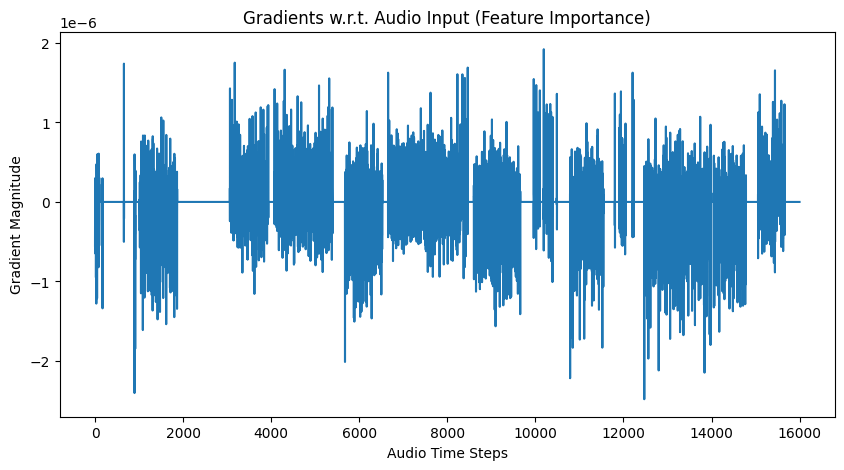

In [ ]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
model_audio = load_model('model1.h5')

# Function to compute gradients with respect to the input audio
def compute_gradients(model, input_audio, target_class):
    with tf.GradientTape() as tape:
        tape.watch(input_audio)
        predictions = model(input_audio)
        loss = predictions[0, target_class]
    gradients = tape.gradient(loss, input_audio)
    return gradients.numpy()

# Function to preprocess the audio file
def preprocess_audio(audio_file, target_length=16000):
    y, sr = librosa.load(audio_file, sr=None)
    if len(y) > target_length:
        y = y[:target_length]
    else:
        y = np.pad(y, (0, max(0, target_length - len(y))), "constant")
    y = np.expand_dims(y, axis=0)  # Add batch dimension
    return tf.convert_to_tensor(y, dtype=tf.float32)  # Convert to TensorFlow tensor

# Preprocess the audio and calculate gradients
audio_file = "/content/drive/MyDrive/archive (3)/audio_speech_actors_01-24/Actor_13/03-01-08-02-01-01-13.wav"
input_audio = preprocess_audio(audio_file)
target_class = 13

# Compute gradients
gradients = compute_gradients(model_audio, input_audio, target_class)

# Plot the gradients
plt.figure(figsize=(10, 5))
plt.plot(gradients[0])
plt.title("Gradients w.r.t. Audio Input (Feature Importance)")
plt.xlabel("Audio Time Steps")
plt.ylabel("Gradient Magnitude")
plt.show()


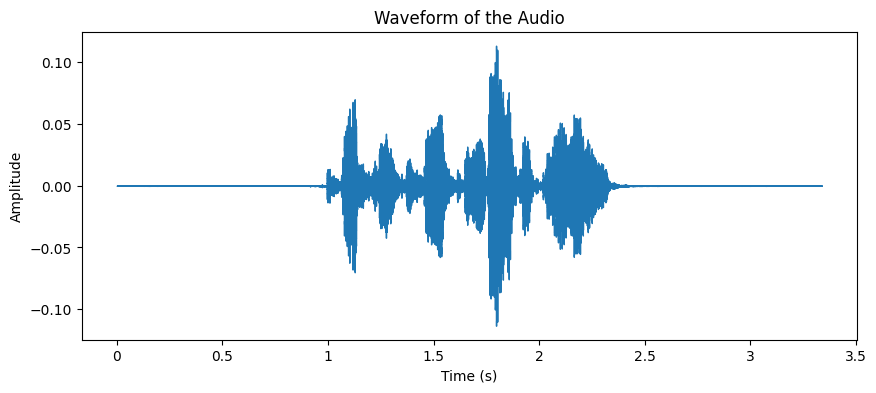

In [ ]:
y, sr = librosa.load(audio_file)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

SHAP is an explanable method which calculates the importance of a feature by calculating it's SHAPLEY values. These values are calculated by comparing the performance of the model with the feature and without the feature in all possible subsets.

SHAP can only be applied to "model" because model using numerical/categorical features for training and predicting. Hence to compare the performance of SHAP on direct audio based model training we use the concept of SHAP in gradients. This edit finds the derivative of each feature (i.e. each time stamp), removes it and then checks the model's output. This isn't a global explanation like the original SHAP concept, it's more of a local approach.